# Problem 1a

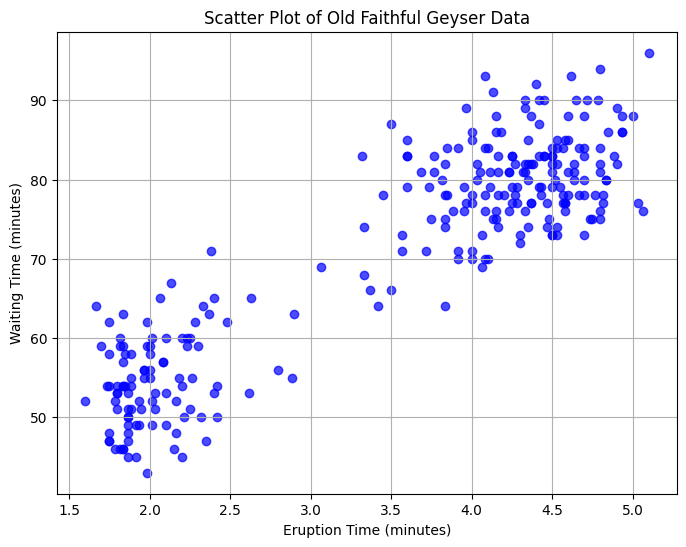

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv( r'C:\Users\gyala\Downloads\faithful.csv')

# Extract relevant columns
eruption_time = data['eruptions'] 
waiting_time = data['waiting']   

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(eruption_time, waiting_time, alpha=0.7, c='blue')
plt.title('Scatter Plot of Old Faithful Geyser Data')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.show()


## Problem 2

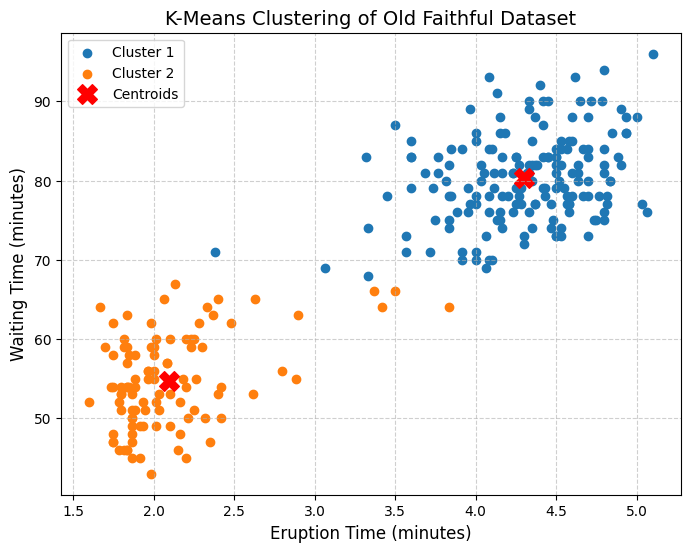

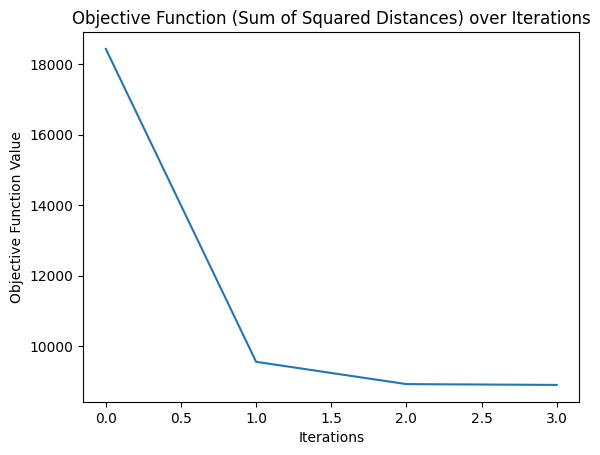

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv(r'C:\Users\gyala\Downloads\faithful.csv')
X = data[['eruptions', 'waiting']].values  # Only use eruption and waiting times

# a) K-means implementation from scratch
def k_means(X, k, max_iters=100, tol=1e-4):
    np.random.seed(42)
    initial_idx = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[initial_idx]

    obj_function = []  # To track objective function values
    for _ in range(max_iters):
        # Step 1: Assign points to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Pairwise distance
        labels = np.argmin(distances, axis=1)

        # Step 2: Recalculate centroids as the mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Step 3: Compute the objective function (sum of squared distances to centroids)
        obj_value = sum(np.min(distances**2, axis=1))
        obj_function.append(obj_value)

        # Check for convergence (centroid movement below tolerance)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels, obj_function

# Apply k-means with 2 clusters
k = 2
centroids, labels, obj_function = k_means(X, k)



# b)  Plot the results
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(X[labels == cluster, 0], X[labels == cluster, 1], label=f"Cluster {cluster + 1}")
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering of Old Faithful Dataset", fontsize=14)
plt.xlabel("Eruption Time (minutes)", fontsize=12)
plt.ylabel("Waiting Time (minutes)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



# c) Plot objective function over iterations to see convergence
plt.plot(obj_function)
plt.title("Objective Function (Sum of Squared Distances) over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.show()


# comparison (optional)

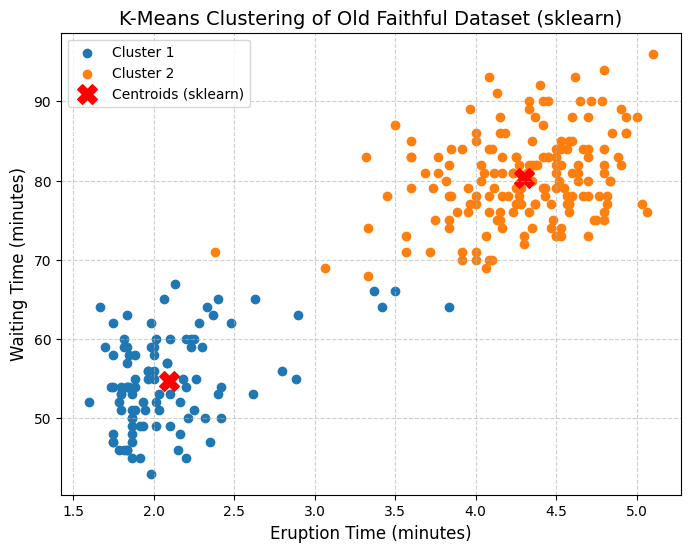

In [56]:
# Alternatively, use sklearn's KMeans to verify results
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels_sklearn = kmeans.labels_
centroids_sklearn = kmeans.cluster_centers_

# Plot using sklearn's results (for comparison)
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(X[labels_sklearn == cluster, 0], X[labels_sklearn == cluster, 1], label=f"Cluster {cluster + 1}")
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], color='red', marker='X', s=200, label='Centroids (sklearn)')
plt.title("K-Means Clustering of Old Faithful Dataset (sklearn)", fontsize=14)
plt.xlabel("Eruption Time (minutes)", fontsize=12)
plt.ylabel("Waiting Time (minutes)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
